In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [116]:
data = pd.read_csv(r"C:\Users\ALMASRIA 4 COMP\Desktop\ML\cell_samples.csv")
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [117]:
data.dtypes


ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [118]:
data['BareNuc'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [119]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'BareNuc' is the column you want to encode
gender_label_encoder = LabelEncoder()

# Fit the encoder with the unique values in 'BareNuc' column
gender_label_encoder.fit(data["BareNuc"])

# Transform the 'BareNuc' column
data["BareNuc"] = gender_label_encoder.transform(data["BareNuc"])


In [120]:
data["BareNuc"].dtypes

dtype('int64')

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=7,shuffle=True)

In [122]:
X = data[['Clump','UnifSize']].to_numpy()
y = data['Class'].to_numpy()

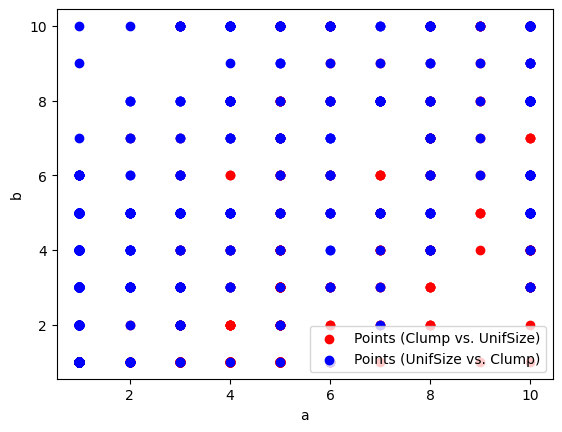

In [123]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has 'Clump' and 'UnifSize' as columns
# Plot 'Clump' on x-axis and 'UnifSize' on y-axis with red color
plt.scatter(data['Clump'], data['UnifSize'], c='red', label='Points (Clump vs. UnifSize)')

# Since you want to plot 'x' and 'y' in different colors, let's say you also want to plot 'UnifSize' on x-axis vs. 'Clump' on y-axis in blue
plt.scatter(data['UnifSize'], data['Clump'], c='blue', label='Points (UnifSize vs. Clump)')

plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.show()


[2]
[4]


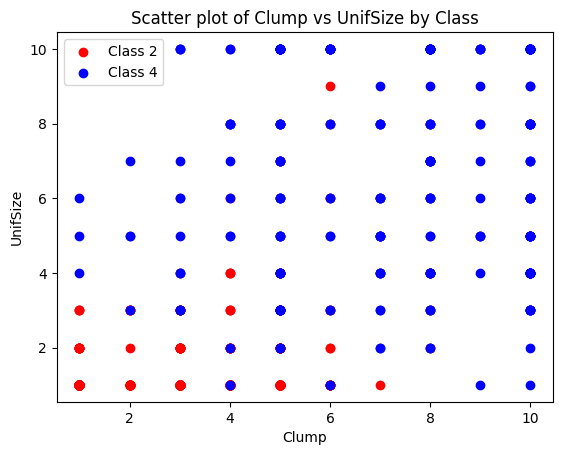

In [124]:

# Split the data based on the 'class' feature
class_2 = data[data['Class'] == 2]
class_4 = data[data['Class'] == 4]


print(class_2["Class"].unique())
print(class_4["Class"].unique())

# Plot the data
plt.scatter(class_2['Clump'], class_2['UnifSize'], c='red', label='Class 2')
plt.scatter(class_4['Clump'], class_4['UnifSize'], c='blue', label='Class 4')

# Add labels and title
plt.xlabel("Clump")
plt.ylabel("UnifSize")
plt.title("Scatter plot of Clump vs UnifSize by Class")
plt.legend()


[2]
[4]


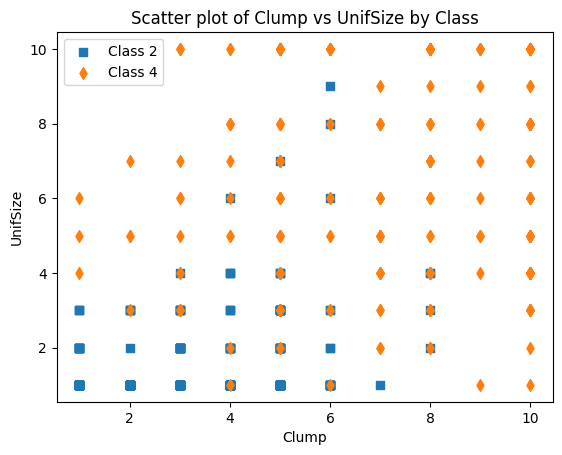

In [125]:

# Split the data based on the 'class' feature
class_2 = data[data['Class'] == 2]
class_4 = data[data['Class'] == 4]


print(class_2["Class"].unique())
print(class_4["Class"].unique())

# Plot the data
plt.scatter(class_2['Clump'], class_2['UnifSize'], marker='s', label='Class 2')
plt.scatter(class_4['Clump'], class_4['UnifSize'], marker='d', label='Class 4')

# Add labels and title
plt.xlabel("Clump")
plt.ylabel("UnifSize")
plt.title("Scatter plot of Clump vs UnifSize by Class")
plt.legend()


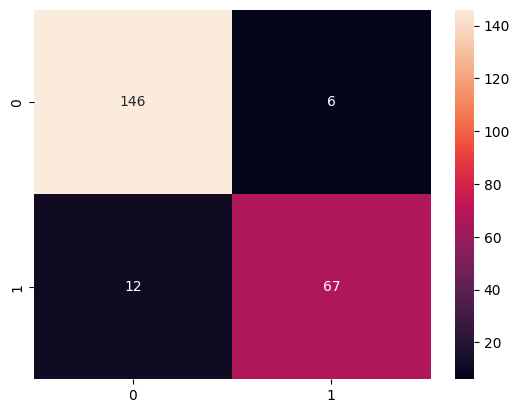

liblinear solver:
              precision    recall  f1-score   support

           2       0.92      0.96      0.94       152
           4       0.92      0.85      0.88        79

    accuracy                           0.92       231
   macro avg       0.92      0.90      0.91       231
weighted avg       0.92      0.92      0.92       231



In [126]:

LR_model = LogisticRegression(solver="liblinear")

LR_model.fit(X_train, y_train)

predictions = LR_model.predict(X_test)
predictions_probability = LR_model.predict_proba(X_test)

cf_matrix = confusion_matrix(y_test, predictions)

plt.figure()
sns.heatmap(cf_matrix, annot=True, fmt=".0f")
plt.show()

classification_report_str = classification_report(y_test, predictions)
print("liblinear solver:")
print(classification_report_str)


lbfgs:
              precision    recall  f1-score   support

           2       0.93      0.97      0.95       152
           4       0.93      0.86      0.89        79

    accuracy                           0.93       231
   macro avg       0.93      0.91      0.92       231
weighted avg       0.93      0.93      0.93       231

liblinear:
              precision    recall  f1-score   support

           2       0.92      0.96      0.94       152
           4       0.92      0.85      0.88        79

    accuracy                           0.92       231
   macro avg       0.92      0.90      0.91       231
weighted avg       0.92      0.92      0.92       231

newton-cg:
              precision    recall  f1-score   support

           2       0.93      0.97      0.95       152
           4       0.93      0.86      0.89        79

    accuracy                           0.93       231
   macro avg       0.93      0.91      0.92       231
weighted avg       0.93      0.93      0.93  

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


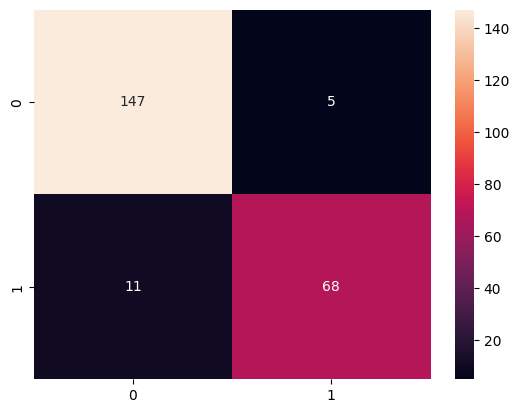

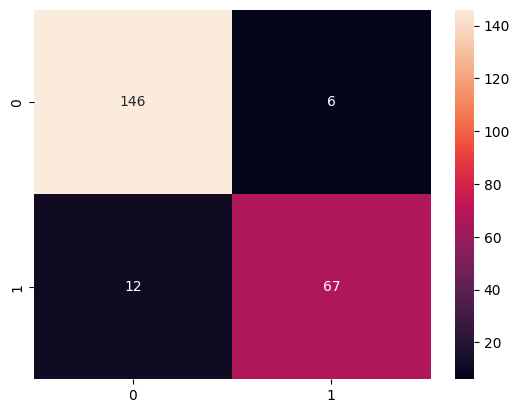

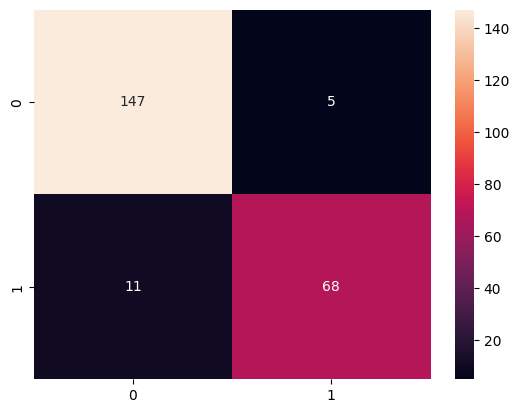

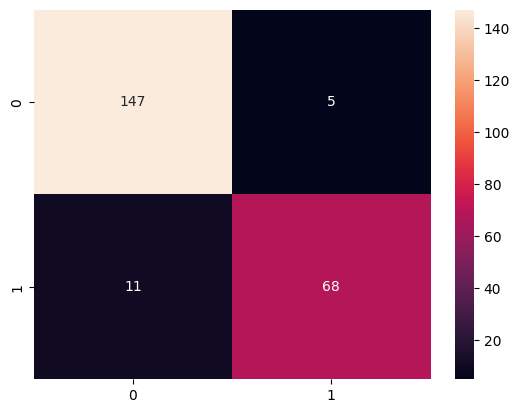

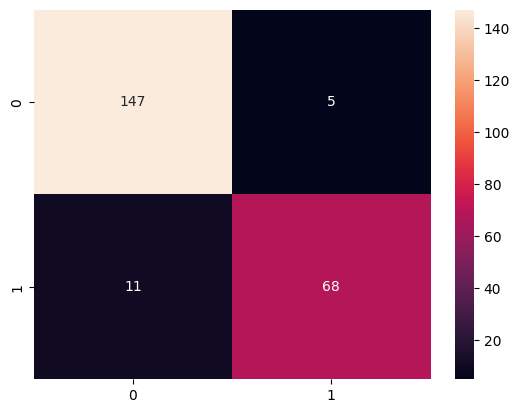

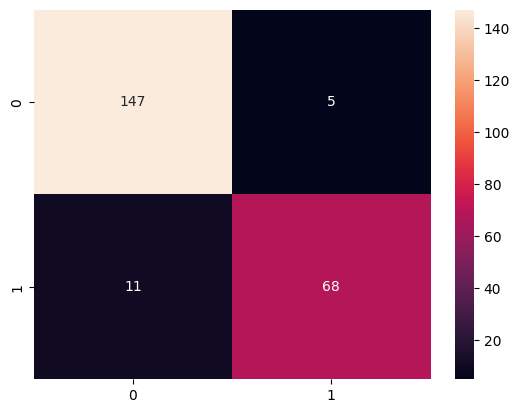

In [127]:
from sklearn.linear_model import LogisticRegression 
solver_list = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

for solver in solver_list:
    LR_model = LogisticRegression(solver=solver)
    LR_model.fit(X_train,y_train)
    predictions = LR_model.predict(X_test)
    predictions_probabilty = LR_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f")
    csr= classification_report(y_test,predictions)
    print(f"{solver}:")
    print(csr)

In [128]:
predictions = LR_model.predict(X_test)
print(predictions[100:105])
print(y_test[100:105])

[2 4 2 2 2]
[4 4 2 2 2]


In [129]:
predictions_probabilty = LR_model.predict_proba(X_test)
predictions_probabilty

array([[8.51914130e-02, 9.14808587e-01],
       [9.83928364e-01, 1.60716359e-02],
       [9.68772041e-01, 3.12279587e-02],
       [9.94757828e-01, 5.24217154e-03],
       [6.41945835e-04, 9.99358054e-01],
       [9.68772041e-01, 3.12279587e-02],
       [1.87696625e-02, 9.81230337e-01],
       [2.88968976e-03, 9.97110310e-01],
       [9.44329926e-01, 5.56700739e-02],
       [1.45525970e-01, 8.54474030e-01],
       [9.82679601e-01, 1.73203991e-02],
       [9.82679601e-01, 1.73203991e-02],
       [9.94757828e-01, 5.24217154e-03],
       [9.82679601e-01, 1.73203991e-02],
       [2.88968976e-03, 9.97110310e-01],
       [9.94757828e-01, 5.24217154e-03],
       [9.90454375e-01, 9.54562531e-03],
       [9.82679601e-01, 1.73203991e-02],
       [2.23992810e-01, 7.76007190e-01],
       [9.94757828e-01, 5.24217154e-03],
       [9.82679601e-01, 1.73203991e-02],
       [9.09162294e-01, 9.08377061e-02],
       [4.72208308e-01, 5.27791692e-01],
       [6.38417016e-01, 3.61582984e-01],
       [9.947578

lbfgs:
              precision    recall  f1-score   support

           2       0.93      0.97      0.95       152
           4       0.93      0.86      0.89        79

    accuracy                           0.93       231
   macro avg       0.93      0.91      0.92       231
weighted avg       0.93      0.93      0.93       231

Jaccard Score: 0.8557
liblinear:
              precision    recall  f1-score   support

           2       0.92      0.96      0.94       152
           4       0.92      0.85      0.88        79

    accuracy                           0.92       231
   macro avg       0.92      0.90      0.91       231
weighted avg       0.92      0.92      0.92       231

Jaccard Score: 0.8392
newton-cg:
              precision    recall  f1-score   support

           2       0.93      0.97      0.95       152
           4       0.93      0.86      0.89        79

    accuracy                           0.93       231
   macro avg       0.93      0.91      0.92       231
w

c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ALMASRIA 4 COMP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


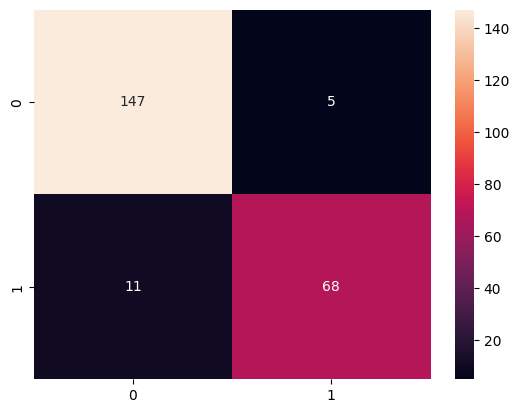

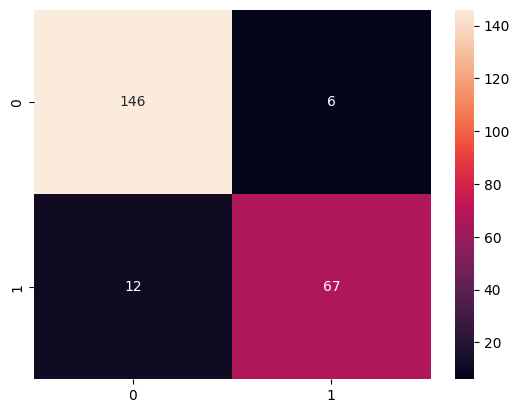

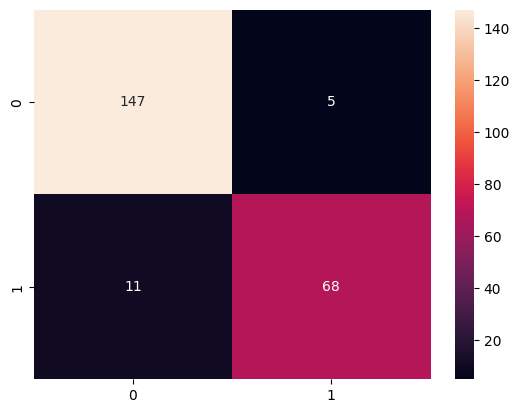

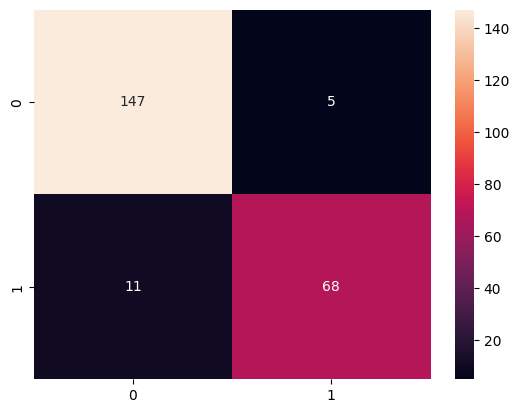

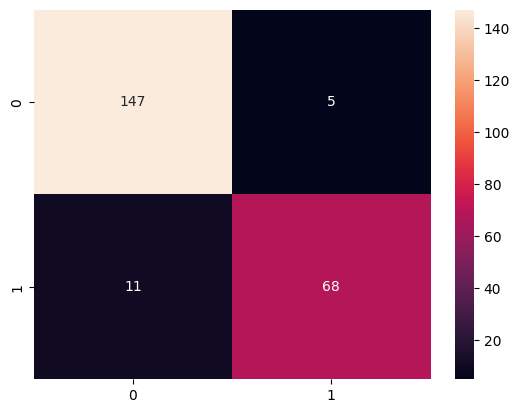

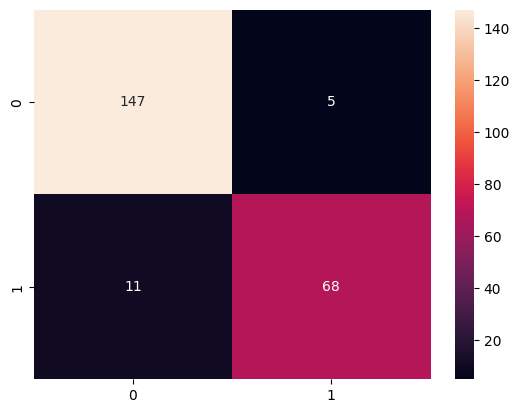

In [143]:
from sklearn.svm import SVC
import seaborn as sns
solver_list = ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]

for solver in solver_list:
    LR_model = LogisticRegression(solver=solver)
    LR_model.fit(X_train,y_train)
    predictions = LR_model.predict(X_test)
    predictions_probabilty = LR_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f")
    csr= classification_report(y_test,predictions)
    print(f"{solver}:")
    print(csr)
    
    jaccard = jaccard_score(y_test, predictions, average='macro') 
    print(f"Jaccard Score: {jaccard:.4f}")


Kernel=linear:
              precision    recall  f1-score   support

           2       0.93      0.97      0.95       152
           4       0.93      0.86      0.89        79

    accuracy                           0.93       231
   macro avg       0.93      0.91      0.92       231
weighted avg       0.93      0.93      0.93       231

Jaccard Score: 0.8557
Kernel=poly:
              precision    recall  f1-score   support

           2       0.91      0.97      0.94       152
           4       0.94      0.82      0.88        79

    accuracy                           0.92       231
   macro avg       0.93      0.90      0.91       231
weighted avg       0.92      0.92      0.92       231

Jaccard Score: 0.8373
Kernel=rbf:
              precision    recall  f1-score   support

           2       0.94      0.97      0.96       152
           4       0.95      0.89      0.92        79

    accuracy                           0.94       231
   macro avg       0.94      0.93      0.94 

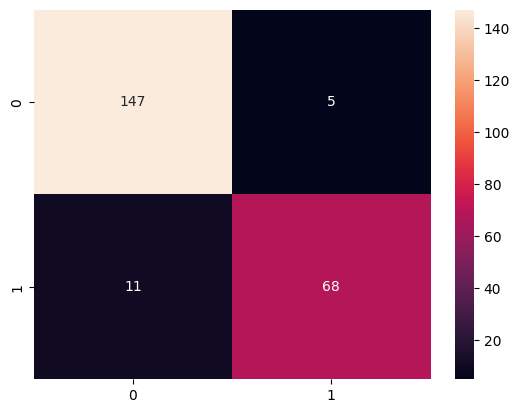

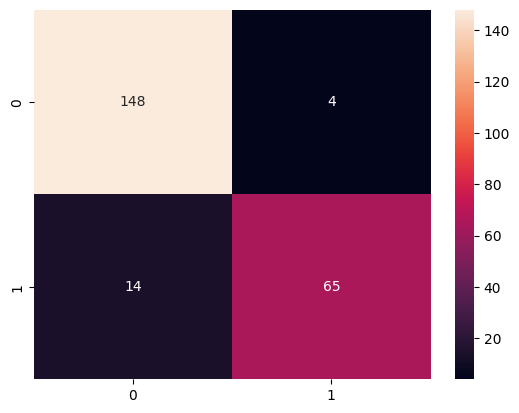

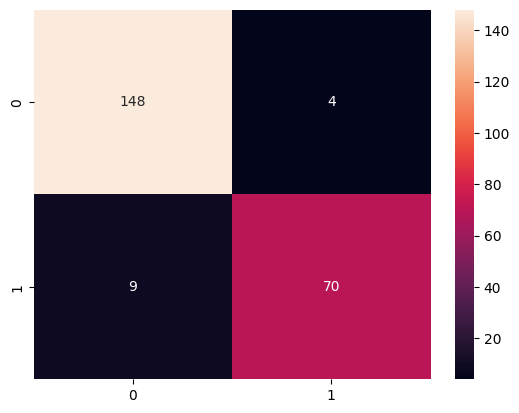

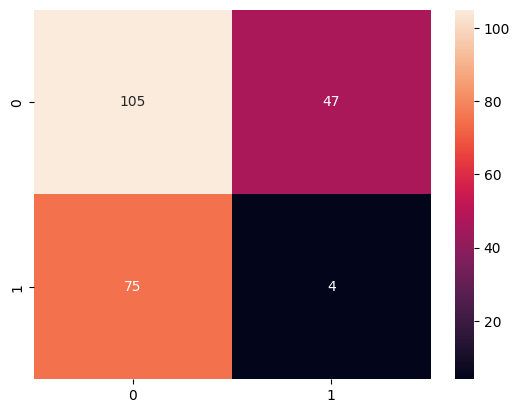

In [141]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of kernels for SVC
kernel_list = ["linear", "poly", "rbf", "sigmoid"]

for kernel in kernel_list:
    SVC_model = SVC(kernel=kernel, probability=True)  # probability=True is needed to use predict_proba
    SVC_model.fit(X_train, y_train)
    predictions = SVC_model.predict(X_test)
    predictions_probability = SVC_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    
    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f")
    csr = classification_report(y_test, predictions)
    
    print(f"Kernel={kernel}:")
    print(csr)


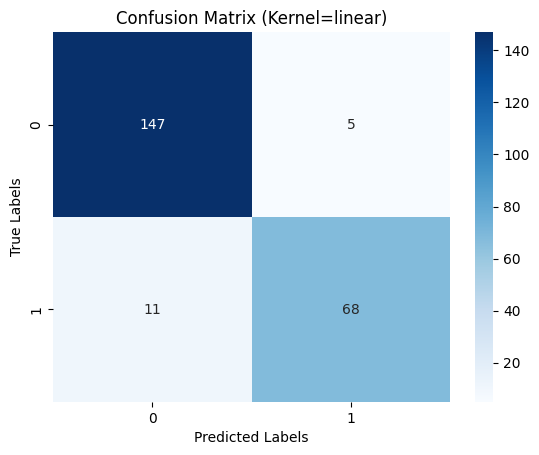

Kernel=linear:
              precision    recall  f1-score   support

           2       0.93      0.97      0.95       152
           4       0.93      0.86      0.89        79

    accuracy                           0.93       231
   macro avg       0.93      0.91      0.92       231
weighted avg       0.93      0.93      0.93       231

Jaccard Score: 0.8557


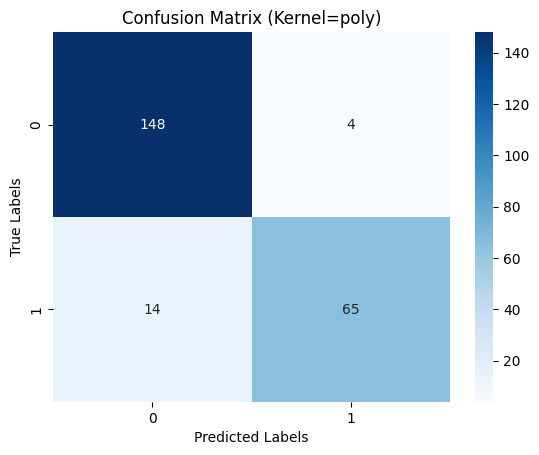

Kernel=poly:
              precision    recall  f1-score   support

           2       0.91      0.97      0.94       152
           4       0.94      0.82      0.88        79

    accuracy                           0.92       231
   macro avg       0.93      0.90      0.91       231
weighted avg       0.92      0.92      0.92       231

Jaccard Score: 0.8373


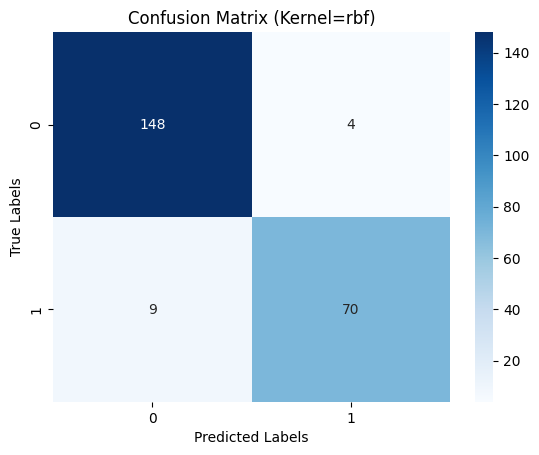

Kernel=rbf:
              precision    recall  f1-score   support

           2       0.94      0.97      0.96       152
           4       0.95      0.89      0.92        79

    accuracy                           0.94       231
   macro avg       0.94      0.93      0.94       231
weighted avg       0.94      0.94      0.94       231

Jaccard Score: 0.8813


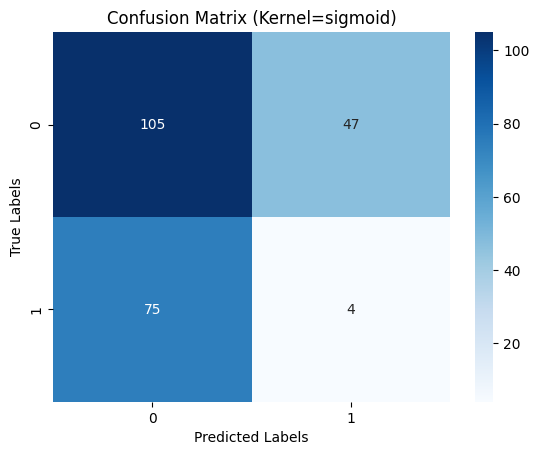

Kernel=sigmoid:
              precision    recall  f1-score   support

           2       0.58      0.69      0.63       152
           4       0.08      0.05      0.06        79

    accuracy                           0.47       231
   macro avg       0.33      0.37      0.35       231
weighted avg       0.41      0.47      0.44       231

Jaccard Score: 0.2472


In [145]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, jaccard_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of kernels for SVC
kernel_list = ["linear", "poly", "rbf", "sigmoid"]

for kernel in kernel_list:
    SVC_model = SVC(kernel=kernel, probability=True)  # probability=True is needed to use predict_proba
    SVC_model.fit(X_train, y_train)
    predictions = SVC_model.predict(X_test)
    predictions_probability = SVC_model.predict_proba(X_test)
    cf_matrix = confusion_matrix(y_test, predictions)
    
    plt.figure()
    sns.heatmap(cf_matrix, annot=True, fmt=".0f", cmap='Blues')
    plt.title(f'Confusion Matrix (Kernel={kernel})')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    csr = classification_report(y_test, predictions)
    
    jaccard = jaccard_score(y_test, predictions, average='macro') 
    
    # Print results
    print(f"Kernel={kernel}:")
    print(csr)
    print(f"Jaccard Score: {jaccard:.4f}")


In [147]:
tel=pd.read_csv(r"C:\Users\ALMASRIA 4 COMP\Desktop\ML\Telco-Customer-Churn.csv")
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
